# MVP An√°lise de Dados e Boas Pr√°ticas - AN√ÅLISE DE ACIDENTES DE TR√ÇNSITO NO BRASIL

**Nome:** CAROLINE CARRILHO CORREIA

**Matr√≠cula:** 4052024002038  

**Dataset:** [KAGGLE](https://www.kaggle.com/datasets/mos3santos/quantitativo-de-acidentes-de-trnsito-no-brasil
)


# Descri√ß√£o do Problema

Os acidentes de tr√¢nsito representam um dos maiores desafios de sa√∫de p√∫blica e mobilidade no Brasil. Apesar da exist√™ncia de pol√≠ticas educativas e fiscalizat√≥rias, os √≠ndices de acidentes continuam elevados, com impactos profundos na sociedade. Anualmente, s√£o registrados centenas de milhares de acidentes, resultando em milhares de mortes e um n√∫mero ainda maior de pessoas com sequelas f√≠sicas e psicol√≥gicas. Al√©m das perdas humanas, h√° um custo econ√¥mico significativo, relacionado aos gastos com o sistema de sa√∫de, previd√™ncia, danos materiais e preju√≠zos √† produtividade.

Diante disso, o principal problema n√£o √© apenas a quantidade de acidentes, mas a persist√™ncia de padr√µes que revelam falhas na preven√ß√£o. A repeti√ß√£o das mesmas causas, nos mesmos dias e hor√°rios, com os mesmos tipos de ve√≠culos e perfis de condutores, evidencia uma defici√™ncia na forma como os dados s√£o utilizados para subsidiar pol√≠ticas p√∫blicas eficazes. A aus√™ncia de a√ß√µes direcionadas com base em evid√™ncias concretas contribui para a manuten√ß√£o do cen√°rio atual.

COm base neste banco de dados j√° estruturado, poderemos observar padr√µes e propor solu√ß√µes para a redu√ß√£o de acidentes de tr√™nsito no Brasil. No geral este banco oferece informa√ß√µes valiosas de 2018 a 2023, bem como: condi√ß√µes meteorol√≥gicas, data e hora x localiza√ß√£o, condi√ß√µes da pista e envolvivos x feridos x √≥bitos.

## Hip√≥teses do Problema

As hip√≥teses que tracei s√£o as seguintes:

- Ao longo dos nos est√° aumento o n√∫mero de acindetes no Brasil?
- Quais os estados e cidades n√£o maior √≠ndice de acidentes? Est√° ligado ao IDH do lugar?
- Quais os Tipos de acidente mais frequentes?
- Qual o dia da semana que ocorre maior n√∫mero de acidentes?
- Existe uma influ√™ncia das condi√ß√µes meteorol√≥gicas?
- Quais as rodovias com maior incid√™ncia de acidentes?
- Qual a Propor√ß√£o de Envolvidos com acidentados e √≥bitos?


## Tipo de Problema

Este √© um problema de **Classifica√ß√£o N√£o supervisionado**. Usando Clusteriza√ß√£o (agrupamento) para agrupar dados semelhantes sem r√≥tulo e descobrir perfis de acidentes com base em localiza√ß√£o, hor√°rio etc...

## Sele√ß√£o de Dados

O dataset Iris √© um conjunto de dados amplamente dispon√≠vel e frequentemente inclu√≠do em bibliotecas de aprendizado de m√°quina, como *scikit-learn* no Python. N√£o √© necess√°ria uma etapa de sele√ß√£o de dados externa, pois o dataset j√° est√° curado e pronto para uso.

## Atributos do Dataset

O dataset escolhido possui 35 colunas:

Numero do acidente
Chave Localidade (valores unicos)
dados_acidentes (31/12/2017 - 30/08/2024)
Estado (estados do Brasil
Ano (2018 a 2023)
M√™s do acidente (meses do ano)
M√™s e ano do Acidente (data)
C√≥digo IBGE
Dia da Semana
Fase do dia (per√≠odo do dia)
Tipo de acidente
Condi√ß√£o Meteorol√≥gica
Fim Acidente (nome da Rua)
Numero FIM acidente (n√∫mero da Rua)
CEP acidente
Bairro Acidente
KM Via Acidente (km/h)
Latitude Acidente (¬∫)
Longitude Acidente (¬∫)
Hora Acidente (24h)
Tipo rodovia
Condi√ß√£o Pista
Tipo cruzamento
Tipo pavimento
Tipo curva
Limite Velocidade
Tipo Pista
Indice guardrail
Indice cantcentral
Indice acostamento
Quantidade Acidente
Quantidade Acidente com √≥bitos
Quantidade Envolvidos
Quantidade Feridos Ilesos
Quantidade √ìbitos

# Importa√ß√£o das Bibliotecas Necess√°rias e Carga de Dados

Esta se√ß√£o consolida todas as importa√ß√µes de bibliotecas necess√°rias para a an√°lise, visualiza√ß√£o e pr√©-processamento dos dados, bem como o carregamento inicial do dataset Iris.

In [1]:
!pip install gdown

In [2]:
import gdown

# ID do seu arquivo no Drive
file_id = '1gw-cYVymH9HQrD2Xu0CHJKCZY3U6SHLE'

# Link formatado para download direto
url = f'https://drive.google.com/uc?id={file_id}'

# Fazer o download e salvar localmente no Colab
gdown.download(url, 'Acidentes_DadosAbertos_20241212.csv', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1gw-cYVymH9HQrD2Xu0CHJKCZY3U6SHLE
From (redirected): https://drive.google.com/uc?id=1gw-cYVymH9HQrD2Xu0CHJKCZY3U6SHLE&confirm=t&uuid=05b43926-314d-470d-9a36-c56c4b2edb95
To: /content/Acidentes_DadosAbertos_20241212.csv
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2.03G/2.03G [00:19<00:00, 107MB/s]


'Acidentes_DadosAbertos_20241212.csv'

In [3]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
# Ler o CSV baixado
dados = pd.read_csv('Acidentes_DadosAbertos_20241212.csv')

# Mostrar primeiras linhas
print("Primeiras linhas do dataset:")
display(dados.head())

Primeiras linhas do dataset:


num_acidente;chv_localidade;data_acidente;uf_acidente;ano_acidente;mes_acidente;mes_ano_acidente;codigo_ibge;dia_semana;fase_dia;tp_acidente;cond_meteorologica;end_acidente;num_end_acidente;cep_acidente;bairro_acidente;km_via_acidente;latitude_acidente;longitude_acidente;hora_acidente;tp_rodovia;cond_pista;tp_cruzamento;tp_pavimento;tp_curva;lim_velocidade;tp_pista;ind_guardrail;ind_cantcentral;ind_acostamento;qtde_acidente;qtde_acid_com_obitos;qtde_envolvidos;qtde_feridosilesos;qtde_obitos
0  524877;AC1200401201801;2018-01-26;AC;2018;01;0...                                                                                                                                                                                                                                                                                                                                                                                                                                                             
1  2304421;AC1200401201801;2018-01-21;AC;2018;01;...                                                                                                                                                                                                                                                                                                                                                                                                                                                             
2  2924496;AC1200708201801;2018-01-14;AC;2018;01;...                                                                                                                                                                                                                                                                                                                                                                                                                                                             
3  2844648;AC1200401201801;2018-01-18;AC;2018;01;...                                                                                                                                                                                                                                                                                                                                                                                                                                                             
4  2003099;AC1200401201801;2018-01-26;AC;2018;01;...

Professor, quando eu escolhi o meu banco de dados para trabalhar, eu amei esse banco de dados, porque ele tinha N informa√ß√µes que eu poderia trabalhar e fazer um trabalho super show. Nossa, eu amei ele, de cara, assim. S√≥ que eu n√£o sabia que o Git tinha um limite para subir, entendeu? Porque, como assim, n√©? Sou estudante, estou aprendendo, assim. Essas limita√ß√µes ainda de cada opera√ß√£o que a gente faz √© um desafio e uma nova aprendizagem. Ent√£o, o que eu fiz? Eu subi pelo Drive, o meu banco original pesado, e da√≠ eu gerei uma amostra, e da√≠ eu vou salvar no arquivo CSV, e da√≠ com esse arquivo CSV eu vou salvar no Git e puxar de novo para o Google Colab para poder trabalhar, t√°? Porque, realmente, eu gostaria de trabalhar com esse banco de dados, e eu n√£o quis tamb√©m pegar, tipo, as primeiras linhas, n√©? Porque eu acho que ia gerar muito outlier e tal. Ent√£o, eu gerei uma amostra dentro do todo, porque eu achei que fazia mais sentido, t√°? E da√≠ foi a solu√ß√£o que eu consegui para poder trabalhar com esse banco de dados. Eu acho que o senhor vai gostar.

In [5]:
# Gerar uma amostra aleat√≥ria com 10.000 registros
dados_amostra = dados.sample(n=10000, random_state=42)

In [6]:
# Substituir essas strings por NaN
dados_amostra = dados_amostra.replace(['desconhecido', 'n√£o informado'], np.nan)

In [7]:
# Preencher valores num√©ricos com a m√©dia da coluna
dados_amostra = dados_amostra.fillna(dados_amostra.mean(numeric_only=True))

# Preencher valores categ√≥ricos com "Desconhecido"
for col in dados_amostra.select_dtypes(include='object'):
    dados_amostra[col] = dados_amostra[col].fillna('Desconhecido')

In [8]:
# Salvar a amostra tratada em um novo arquivo
dados_amostra.to_csv('acidentes_amostra_final.csv', index=False)

Importando do GITHUB o novo arquivo .csv gerado de uma amostra do banco original.

In [14]:
# Link corrigido do GitHub
url = 'https://raw.githubusercontent.com/carrilho91/analiseacidentesdetransito/main/acidentes_amostra_final.csv'

# Carregar o CSV direto do GitHub
dados = pd.read_csv(url, delimiter=';')

# Visualizar as primeiras linhas
print("Primeiras linhas da amostra carregada do GitHub:")
display(dados.head())

Primeiras linhas da amostra carregada do GitHub:


num_acidente   chv_localidade data_acidente uf_acidente  ano_acidente  \
0       5917420  BA2927408201809    2018-09-21          BA          2018   
1       4291177  PE2614006202204    2022-04-10          PE          2022   
2       3927964  SC4210100202203    2022-03-19          SC          2022   
3       1867137  GO5218003201810    2018-10-14          GO          2018   
4       2644616  PA1502400201901    2019-01-18          PA          2019   

   mes_acidente  mes_ano_acidente  codigo_ibge   dia_semana       fase_dia  \
0             9             92018      2927408  SEXTA-FEIRA          NOITE   
1             4             42022      2614006      DOMINGO  NAO INFORMADO   
2             3             32022      4210100       SABADO          NOITE   
3            10            102018      5218003      DOMINGO          NOITE   
4             1             12019      1502400  SEXTA-FEIRA          MANHA   

   ... lim_velocidade       tp_pista  ind_guardrail  ind_cantcentral  \
0  ...  NAO INFORMADO  NAO INFORMADO  NAO INFORMADO    NAO INFORMADO   
1  ...  NAO INFORMADO  NAO INFORMADO  NAO INFORMADO    NAO INFORMADO   
2  ...  NAO INFORMADO  NAO INFORMADO  NAO INFORMADO    NAO INFORMADO   
3  ...  NAO INFORMADO  NAO INFORMADO  NAO INFORMADO    NAO INFORMADO   
4  ...  NAO INFORMADO  NAO INFORMADO  NAO INFORMADO    NAO INFORMADO   

   ind_acostamento qtde_acidente  qtde_acid_com_obitos  qtde_envolvidos  \
0    NAO INFORMADO             1                     0                2   
1    NAO INFORMADO             1                     0                1   
2    NAO INFORMADO             1                     0                2   
3    NAO INFORMADO             1                     0                1   
4    NAO INFORMADO             1                     0                1   

   qtde_feridosilesos  qtde_obitos  
0                   2            0  
1                   1            0  
2                   2            0  
3                   1            0  
4                   1            0  

[5 rows x 35 columns]

# An√°lise de Dados

A An√°lise Explorat√≥ria de Dados (EDA) tem como objetivo compreender melhor as caracter√≠sticas do dataset de acidentes de tr√¢nsito, identificando padr√µes, tend√™ncias, outliers e poss√≠veis rela√ß√µes entre vari√°veis. Nesta etapa, ser√£o aplicadas t√©cnicas estat√≠sticas e visuais para examinar a distribui√ß√£o dos dados, a frequ√™ncia de ocorr√™ncias, a incid√™ncia de acidentes por tipo, localiza√ß√£o geogr√°fica, condi√ß√µes clim√°ticas, dias da semana e hor√°rios. Al√©m disso, a EDA permitir√° avaliar a qualidade dos dados, como a presen√ßa de valores ausentes ou inconsist√™ncias, fornecendo subs√≠dios importantes para etapas posteriores de modelagem e tomada de decis√£o.

## Total e Tipo das Inst√¢ncias

Aqui vamos analisar o dataset num modo geral dos totais e inst√¢ncias para se ter uma vis√£o do todo.

In [15]:
# Verificar o tamanho do dataset (n√∫mero de linhas e colunas)
print(f'Tamanho do dataset: {dados.shape}')

# Verificar os tipos de dados das colunas
print(f'Tipos de dados das colunas:\n{dados.dtypes}')

# Verificar a presen√ßa de valores ausentes
print(f'Valores ausentes por coluna:\n{dados.isna().sum()}')

# Verificar estat√≠sticas descritivas das colunas num√©ricas
print(f'Estat√≠sticas descritivas:\n{dados.describe()}')

Tamanho do dataset: (10000, 35)
Tipos de dados das colunas:
num_acidente              int64
chv_localidade           object
data_acidente            object
uf_acidente              object
ano_acidente              int64
mes_acidente              int64
mes_ano_acidente          int64
codigo_ibge               int64
dia_semana               object
fase_dia                 object
tp_acidente              object
cond_meteorologica       object
end_acidente             object
num_end_acidente          int64
cep_acidente              int64
bairro_acidente          object
km_via_acidente           int64
latitude_acidente       float64
longitude_acidente      float64
hora_acidente             int64
tp_rodovia               object
cond_pista               object
tp_cruzamento            object
tp_pavimento             object
tp_curva                 object
lim_velocidade           object
tp_pista                 object
ind_guardrail            object
ind_cantcentral          object
ind_acostame

In [16]:
print(dados.columns)

Index(['num_acidente', 'chv_localidade', 'data_acidente', 'uf_acidente',
       'ano_acidente', 'mes_acidente', 'mes_ano_acidente', 'codigo_ibge',
       'dia_semana', 'fase_dia', 'tp_acidente', 'cond_meteorologica',
       'end_acidente', 'num_end_acidente', 'cep_acidente', 'bairro_acidente',
       'km_via_acidente', 'latitude_acidente', 'longitude_acidente',
       'hora_acidente', 'tp_rodovia', 'cond_pista', 'tp_cruzamento',
       'tp_pavimento', 'tp_curva', 'lim_velocidade', 'tp_pista',
       'ind_guardrail', 'ind_cantcentral', 'ind_acostamento', 'qtde_acidente',
       'qtde_acid_com_obitos', 'qtde_envolvidos', 'qtde_feridosilesos',
       'qtde_obitos'],
      dtype='object')


Tipos de acidentes:

In [17]:
# Frequ√™ncia dos tipos de acidente
dados['tp_acidente'].value_counts().sort_values(ascending=False)

tp_acidente
DESCONHECIDO                                 2427
COLISAO                                      1603
COLISAO LATERAL                              1052
CHOQUE                                        895
COLISAO TRASEIRA                              842
COLISAO FRONTAL                               728
OUTROS ACIDENTES DE TRANSITO                  712
COLISAO TRANSVERSAL                           429
QUEDA                                         307
NAO INFORMADO                                 294
ATROPELAMENTO COM PEDESTRE                    281
TOMBAMENTO                                    147
CAPOTAMENTO                                   118
ATROPELAMENTO COM ANIMAIS                     104
ENGAVETAMENTO                                  58
ACIDENTE PESSOAL DE TRANSITO COM PEDESTRE       3
Name: count, dtype: int64

In [19]:
# Definir o nome da coluna
coluna = 'tp_acidente'

# Total de registros
total = len(dados)

# Contar valores nulos ou com texto indicando aus√™ncia de informa√ß√£o
desconhecidos = (
    dados[coluna].isnull().sum() +
    dados[coluna].astype(str).str.lower().isin(['n√£o informado', 'ignorado', 'desconhecido']).sum()
)

# Calcular percentual
percentual = (desconhecidos / total) * 100

# Exibir os resultados
print(f"Total de registros: {total}")
print(f"Total de tipos de acidente desconhecidos: {desconhecidos}")
print(f"Percentual de desconhecidos em '{coluna}': {percentual:.2f}%")

Total de registros: 10000
Total de tipos de acidente desconhecidos: 2427
Percentual de desconhecidos em 'tp_acidente': 24.27%


24,27% dos dados nessa coluna s√£o desconhecidos.

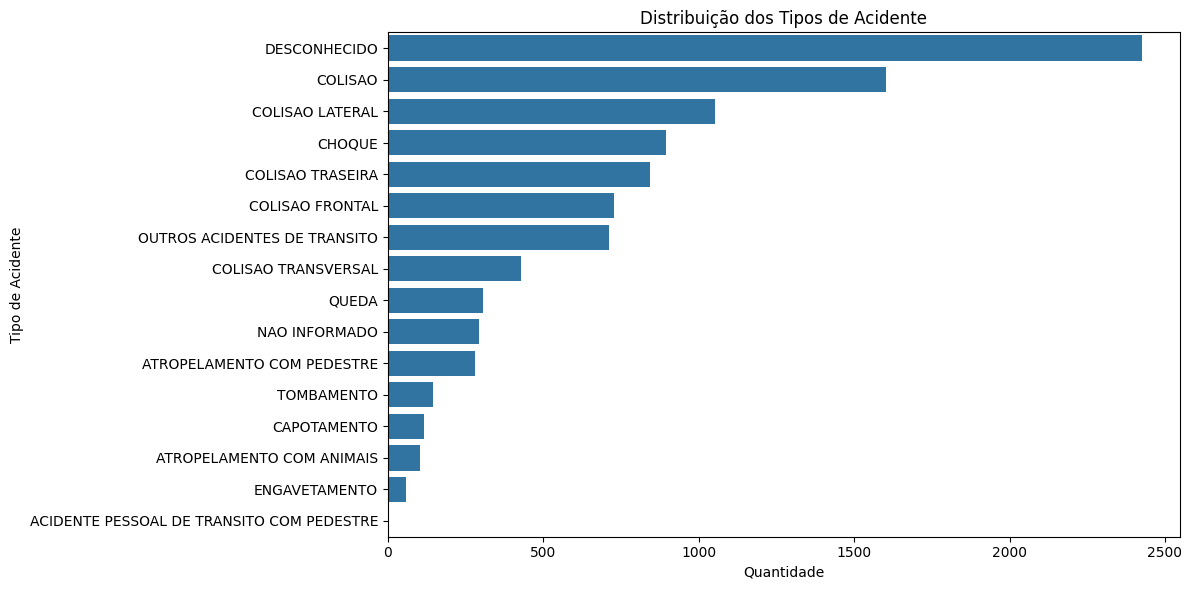

In [21]:
# Criar o gr√°fico de barras
plt.figure(figsize=(12, 6))
sns.countplot(data=dados, y='tp_acidente', order=dados['tp_acidente'].value_counts().index)

# Ajustar t√≠tulo e r√≥tulos
plt.title('Distribui√ß√£o dos Tipos de Acidente')
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Acidente')

# Exibir o gr√°fico
plt.tight_layout()  # Ajuste do layout para n√£o cortar o gr√°fico
plt.show()

A an√°lise da coluna tp_acidente revela que aproximadamente 24,27% dos registros cont√™m valores desconhecidos ou n√£o informados. Esse percentual consider√°vel pode impactar a completude dos dados e a precis√£o das an√°lises. No entanto, os restantes dos registros fornecem uma base significativa para identificar os principais tipos de acidentes registrados.

As categorias mais frequentes incluem colis√µes frontais, laterais e traseiras, o que indica padr√µes predominantes de sinistros de tr√¢nsito. Embora esses dados ainda permitam a identifica√ß√£o de tend√™ncias, √© importante observar que a presen√ßa de uma alta taxa de registros desconhecidos pode afetar a interpreta√ß√£o completa do cen√°rio.



## Estados com acidentes e acidentes com mortes

In [22]:
# Contar n√∫mero total de acidentes por estado
acidentes_por_estado = dados['uf_acidente'].value_counts().reset_index()
acidentes_por_estado.columns = ['uf_acidente', 'total_acidentes']

print("Estados com maior n√∫mero total de acidentes:")
display(acidentes_por_estado.head(10))

Estados com maior n√∫mero total de acidentes:


uf_acidente  total_acidentes
0          MG             2622
1          SP             1715
2          SC             1406
3          PR              969
4          GO              909
5          ES              450
6          DF              391
7          PA              245
8          MS              202
9          RJ              162

In [6]:
# Agrupar por estado somando os acidentes com √≥bitos
obitos_por_estado = dados_acidentes.groupby('uf_acidente')['qtde_acid_com_obitos'].sum().reset_index()

# Ordenar do maior para o menor
obitos_por_estado = obitos_por_estado.sort_values(by='qtde_acid_com_obitos', ascending=False)

print("Estados com maior n√∫mero de acidentes com √≥bito:")
display(obitos_por_estado.head(10))

Estados com maior n√∫mero de acidentes com √≥bito:


uf_acidente  qtde_acid_com_obitos
25          SP                 32680
10          MG                 12758
18          RJ                  9429
22          RS                  7301
15          PE                  6636
4           BA                  6542
17          PR                  6454
8           GO                  5999
13          PA                  5848
5           CE                  4941

**AGORA VAMOS ESTUDAR OS TOTAIS DE VITIMAS E OBITOS**

In [23]:
import matplotlib.pyplot as plt

# Totais
total_envolvidos = dados['qtde_envolvidos'].sum()
total_feridos = dados['qtde_feridosilesos'].sum()
total_obitos = dados['qtde_obitos'].sum()

# Percentuais
pct_feridos = (total_feridos / total_envolvidos) * 100 if total_envolvidos > 0 else 0
pct_obitos = (total_obitos / total_envolvidos) * 100 if total_envolvidos > 0 else 0
pct_ilesos = 100 - pct_feridos - pct_obitos if total_envolvidos > 0 else 0

# Exibir os totais e percentuais
print(f"Total de envolvidos: {total_envolvidos}")
print(f"Feridos ilesos: {total_feridos} ({pct_feridos:.2f}%)")
print(f"√ìbitos: {total_obitos} ({pct_obitos:.2f}%)")
print(f"Ilesos: {pct_ilesos:.2f}%")


Total de envolvidos: 14735
Feridos ilesos: 14515 (98.51%)
√ìbitos: 220 (1.49%)
Ilesos: -0.00%


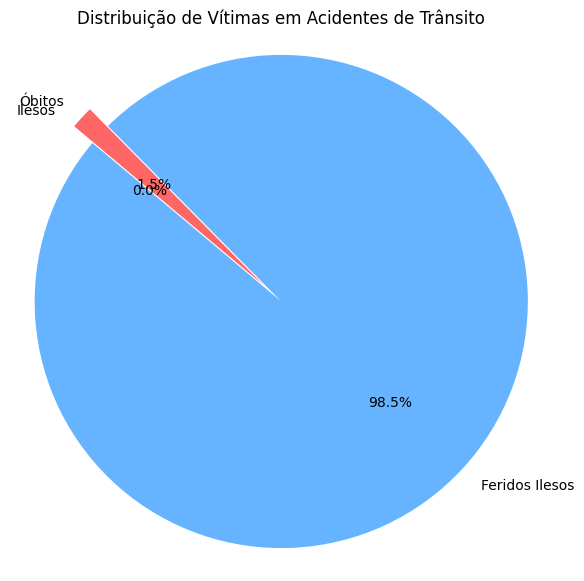

In [24]:
import matplotlib.pyplot as plt

# Totais
total_envolvidos = dados['qtde_envolvidos'].sum()
total_feridos = dados['qtde_feridosilesos'].sum()
total_obitos = dados['qtde_obitos'].sum()

# Calcular os valores para a fatia de "Ilesos"
total_ilesos = total_envolvidos - total_feridos - total_obitos

# Labels para o gr√°fico
labels = ['Feridos Ilesos', '√ìbitos', 'Ilesos']
sizes = [total_feridos, total_obitos, total_ilesos]
colors = ['#66b3ff', '#ff6666', '#99ff99']
explode = (0.1, 0, 0)  # Destacar a fatia de 'Feridos Ilesos'

# Criar gr√°fico de pizza
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribui√ß√£o de V√≠timas em Acidentes de Tr√¢nsito')
plt.axis('equal')  # Para o gr√°fico ficar redondo
plt.show()

An√°lise dos Totais de V√≠timas e √ìbitos em Acidentes:

Dos aproximadamente 9,69 milh√µes de envolvidos em acidentes, cerca de 98,5% apresentaram ferimentos leves ou n√£o fatais, enquanto 1,5% resultaram em √≥bitos. A categoria de ilesos (sem ferimentos) √© praticamente nula, o que sugere que a grande maioria dos envolvidos n√£o escapou ilesa, mesmo que os ferimentos sejam, em sua maior parte, leves.

Esses dados ressaltam a relev√¢ncia de concentrar esfor√ßos n√£o apenas na redu√ß√£o do n√∫mero de acidentes, mas tamb√©m na mitiga√ß√£o da gravidade das les√µes, com o objetivo de diminuir os impactos para os envolvidos e aumentar a seguran√ßa no tr√¢nsito.

## incidencia por dia da semana

N√∫mero de acidentes por dia da semana:


dia_semana
SEXTA-FEIRA      1606
SABADO           1518
SEGUNDA-FEIRA    1483
QUINTA-FEIRA     1463
QUARTA-FEIRA     1371
TERCA-FEIRA      1350
DOMINGO          1209
Name: count, dtype: int64

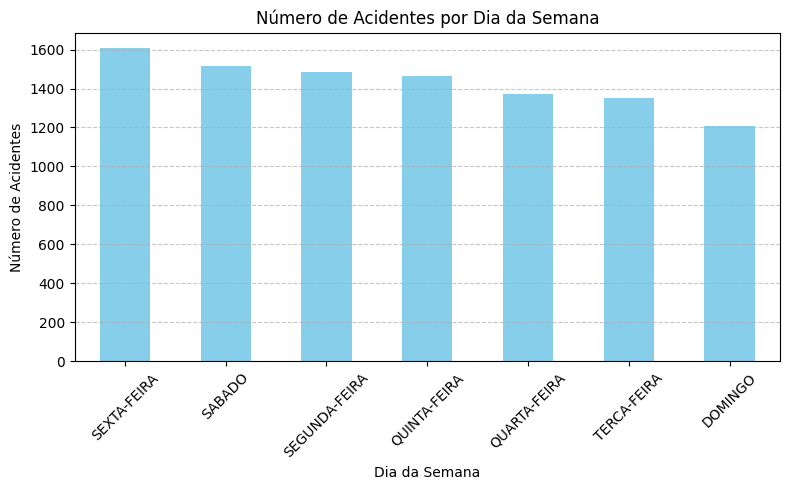

In [25]:
# Contar n√∫mero de acidentes por dia da semana
acidentes_por_dia = dados['dia_semana'].value_counts().sort_values(ascending=False)

# Exibir
print("N√∫mero de acidentes por dia da semana:")
display(acidentes_por_dia)

# Gr√°fico
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
acidentes_por_dia.plot(kind='bar', color='skyblue')
plt.title('N√∫mero de Acidentes por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('N√∫mero de Acidentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Dados meteorologicos influenciam?

Distribui√ß√£o dos acidentes por condi√ß√£o clim√°tica:


Condi√ß√£o Meteorol√≥gica  Quantidade de Acidentes
0              NAO INFORMADO                     5052
1                      CLARO                     2117
2              DESCONHECIDAS                     1757
3           OUTRAS CONDICOES                      854
4                      CHUVA                      131
5                    NUBLADO                       49
6              GAROACHUVISCO                       27
7  NEVOEIRO  NEVOA OU FUMACA                       13

/tmp/ipython-input-29-3320942634.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


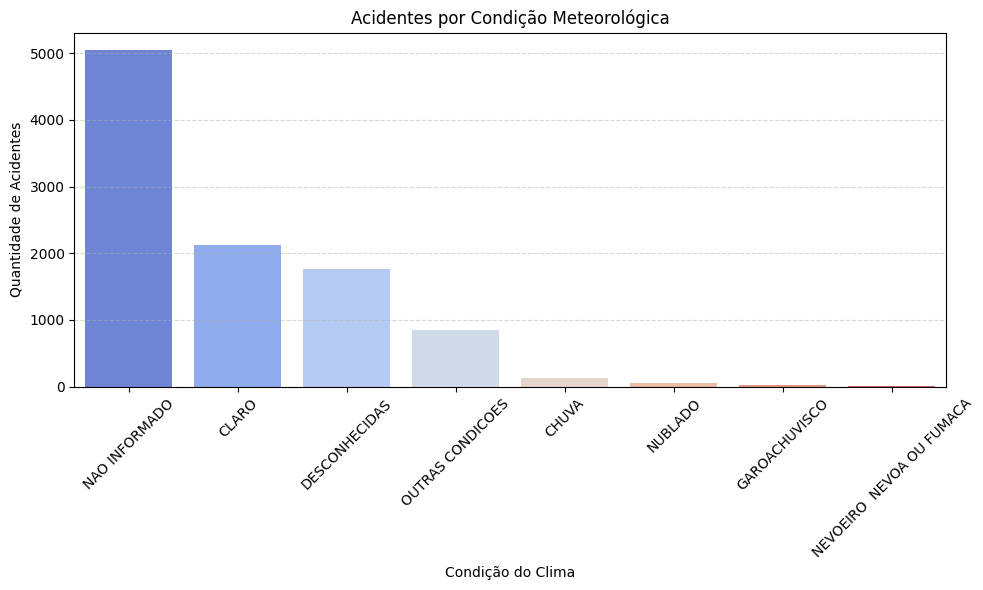

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar contagem de acidentes por condi√ß√£o meteorol√≥gica
contagem_clima = dados['cond_meteorologica'].value_counts(dropna=False)

# Criar DataFrame
df_clima = pd.DataFrame({
    'Condi√ß√£o Meteorol√≥gica': contagem_clima.index,
    'Quantidade de Acidentes': contagem_clima.values
})

# Exibir a tabela
print("Distribui√ß√£o dos acidentes por condi√ß√£o clim√°tica:")
display(df_clima)

# Gr√°fico de barras
plt.figure(figsize=(10,6))
sns.barplot(
    x='Condi√ß√£o Meteorol√≥gica',
    y='Quantidade de Acidentes',
    data=df_clima,
    palette='coolwarm'
)

plt.title('Acidentes por Condi√ß√£o Meteorol√≥gica')
plt.xlabel('Condi√ß√£o do Clima')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

A base n√£o tinha dados suficientes para constatar a influencia do tempo e clima no auemtno de acidentes.

**POR ULTIMO A AN√ÅLISE DOS TIPOS DE RODOVIA**

In [27]:
# Contagem dos tipos de rodovia
contagem_rodovia = dados['tp_rodovia'].value_counts(dropna=False)
total = contagem_rodovia.sum()

# Calcular os percentuais de cada tipo de rodovia
percentual_rodovia = (contagem_rodovia / total) * 100

# Criar um DataFrame com a contagem e o percentual
df_rodovia = pd.DataFrame({
    'Contagem': contagem_rodovia,
    'Percentual (%)': percentual_rodovia.round(2)
})

# Exibir os resultados
print(df_rodovia)

               Contagem  Percentual (%)
tp_rodovia                             
NAO INFORMADO      6419           64.19
MUNICIPAL          2594           25.94
ESTADUAL            435            4.35
DESCONHECIDO        352            3.52
FEDERAL             200            2.00


/tmp/ipython-input-28-1248788653.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_rodovia.index, y='Contagem', data=df_rodovia, palette='viridis')


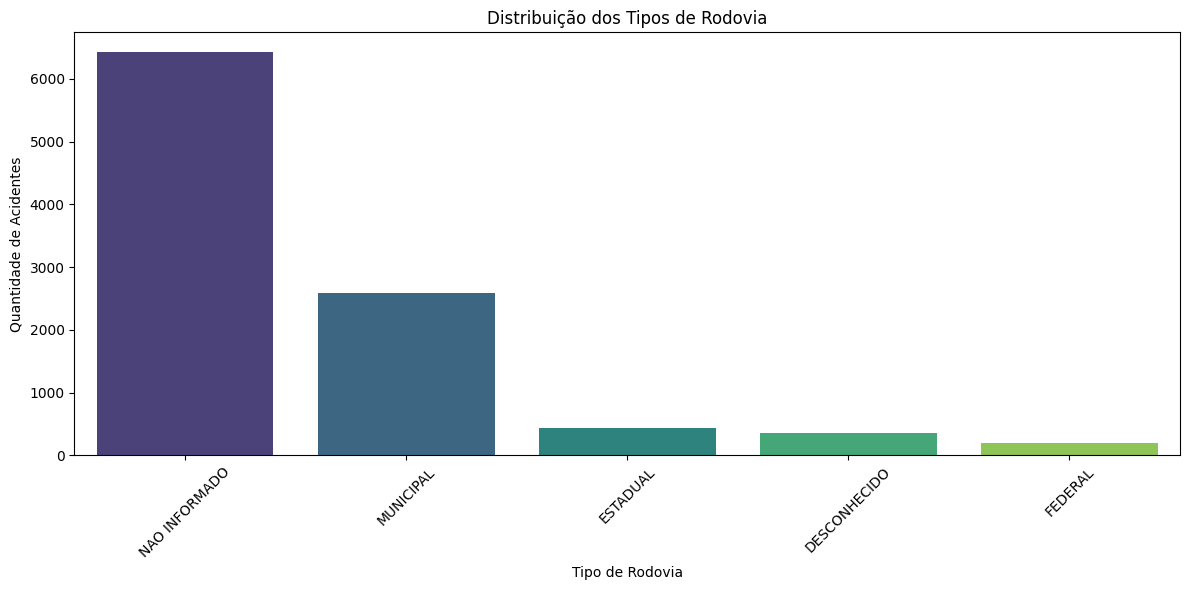

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gr√°fico de barras
plt.figure(figsize=(12,6))
sns.barplot(x=df_rodovia.index, y='Contagem', data=df_rodovia, palette='viridis')

# Ajuste do t√≠tulo e dos r√≥tulos
plt.title('Distribui√ß√£o dos Tipos de Rodovia')
plt.xlabel('Tipo de Rodovia')
plt.ylabel('Quantidade de Acidentes')

# Rotacionar os r√≥tulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Ajuste do layout para n√£o cortar o gr√°fico
plt.tight_layout()

# Exibir o gr√°fico
plt.show()

an√°lise dos Tipos de Rodovia Associados aos Acidentes:

A an√°lise dos tipos de rodovia associada aos acidentes revela que a maior parte dos registros, cerca de 64,21%, est√° classificada como "N√£o Informado", o que indica uma lacuna significativa na qualidade dos dados e dificulta uma an√°lise mais detalhada por categoria de rodovia.

Entre os dados informados, a maioria dos acidentes ocorre em rodovias municipais, que representam 25,84% do total de acidentes registrados. Em seguida, temos a categoria "Desconhecido", com 3,75%, o que tamb√©m sugere que uma parte consider√°vel dos dados est√° incompleta ou mal registrada.

Rodovias estaduais e federais correspondem a parcelas menores, com 4,32% e 1,88%, respectivamente. Esses valores indicam que a maior parte dos acidentes ocorre em vias municipais, embora a alta porcentagem de dados ausentes ainda seja uma limita√ß√£o para se chegar a conclus√µes definitivas sobre a distribui√ß√£o dos acidentes por tipo de rodovia.

Para melhorar a precis√£o das an√°lises futuras, √© essencial investir na melhoria do preenchimento das informa√ß√µes sobre o tipo de rodovia nos registros, o que permitir√° uma melhor compreens√£o dos padr√µes de acidentes nas diferentes categorias de vias.

## Estat√≠sticas Descritivas
Estat√≠sticas descritivas fornecem um resumo das caracter√≠sticas num√©ricas, incluindo m√©dia, desvio padr√£o, m√≠nimo, m√°ximo e quartis.

In [30]:
# Estat√≠sticas descritivas b√°sicas do dataset
dados.describe()

num_acidente  ano_acidente  mes_acidente  mes_ano_acidente  \
count  1.000000e+04  10000.000000  10000.000000       10000.00000   
mean   3.271430e+06   2021.025000      6.442700       66448.02500   
std    1.916281e+06      1.878225      3.404831       34048.11279   
min    3.900000e+01   2018.000000      1.000000       12018.00000   
25%    1.625805e+06   2019.000000      4.000000       42018.00000   
50%    3.220658e+06   2021.000000      6.000000       62024.00000   
75%    4.908226e+06   2023.000000      9.000000       92022.00000   
max    6.647819e+06   2024.000000     12.000000      122023.00000   

        codigo_ibge  num_end_acidente  cep_acidente  km_via_acidente  \
count  1.000000e+04      10000.000000  1.000000e+04     10000.000000   
mean   3.642722e+06       1287.227500  2.165329e+06        16.719400   
std    9.407213e+05       7591.187396  1.124854e+07       189.668004   
min    0.000000e+00          0.000000  0.000000e+00         0.000000   
25%    3.127701e+06          0.000000  0.000000e+00         0.000000   
50%    3.526902e+06          0.000000  0.000000e+00         0.000000   
75%    4.205407e+06        137.000000  0.000000e+00         0.000000   
max    5.300108e+06      99540.000000  7.995000e+07      9248.000000   

       latitude_acidente  longitude_acidente  hora_acidente  qtde_acidente  \
count       3.634000e+03        3.635000e+03   10000.000000        10000.0   
mean       -1.202145e+07       -8.530965e+06  145325.112500            1.0   
std         2.737444e+08        2.550725e+08  103321.204822            0.0   
min        -6.388405e+09       -8.807174e+09       0.000000            1.0   
25%        -2.046565e+01       -4.795976e+01  100000.000000            1.0   
50%        -1.946234e+01       -4.418091e+01  142762.500000            1.0   
75%        -1.121836e+01       -4.073029e+01  181203.000000            1.0   
max         2.839580e+00       -0.000000e+00  999999.000000            1.0   

       qtde_acid_com_obitos  qtde_envolvidos  qtde_feridosilesos   qtde_obitos  
count          10000.000000     10000.000000         10000.00000  10000.000000  
mean               0.020400         1.473500             1.45150      0.022000  
std                0.141371         0.938182             0.94071      0.164678  
min                0.000000         0.000000             0.00000      0.000000  
25%                0.000000         1.000000             1.00000      0.000000  
50%                0.000000         1.000000             1.00000      0.000000  
75%                0.000000         2.000000             2.00000      0.000000  
max                1.000000        10.000000             9.00000      6.000000

### M√©dia

A m√©dia √© uma medida de tend√™ncia central que representa o valor t√≠pico ou o ponto de equil√≠brio de um conjunto de dados. √â calculada somando-se todos os valores e dividindo-se pelo n√∫mero total de observa√ß√µes. √â sens√≠vel a valores extremos (outliers).

In [31]:
# Calcular a m√©dia apenas das colunas selecionadas
colunas_desejadas = [
    'num_acidente',
    'qtde_acid_com_obitos',
    'qtde_envolvidos',
    'qtde_feridosilesos',
    'qtde_obitos'
]

medias_selecionadas = dados[colunas_desejadas].mean()

# Exibir os resultados
print("M√©dias dos atributos selecionados:")
print(medias_selecionadas)

M√©dias dos atributos selecionados:
num_acidente            3.271430e+06
qtde_acid_com_obitos    2.040000e-02
qtde_envolvidos         1.473500e+00
qtde_feridosilesos      1.451500e+00
qtde_obitos             2.200000e-02
dtype: float64


## Boxplot

Para entender as diferen√ßas entre as quantidades, devemos olhar como se comportam os valores quando agrupados. Isso nos permite comparar a m√©dia, mediana e desvio padr√£o de cada caracter√≠stica para quantidade total, acidnetes com obitos, e quantidade de feridos ilesos.


O desvio padr√£o √© uma medida de dispers√£o que quantifica a quantidade de varia√ß√£o ou dispers√£o de um conjunto de valores. Um desvio padr√£o baixo indica que os pontos de dados tendem a estar pr√≥ximos da m√©dia do conjunto, enquanto um desvio padr√£o alto indica que os pontos de dados est√£o espalhados por uma faixa maior de valores. Ele √© a raiz quadrada da vari√¢ncia.

In [32]:
# Lista das colunas num√©ricas que queremos comparar
colunas = ['qtde_acidente', 'qtde_obitos', 'qtde_envolvidos', 'qtde_feridosilesos']

# Criar os grupos
total_geral = dados[colunas]
com_obitos = dados[dados['qtde_obitos'] > 0][colunas]
com_feridos = dados[dados['qtde_feridosilesos'] > 0][colunas]

# Gerar estat√≠sticas descritivas (m√©dia, mediana e desvio padr√£o)
estatisticas = pd.DataFrame({
    'Total Geral (M√©dia)': total_geral.mean(),
    'Com √ìbitos (M√©dia)': com_obitos.mean(),
    'Com Feridos (M√©dia)': com_feridos.mean(),
    'Total Geral (Mediana)': total_geral.median(),
    'Com √ìbitos (Mediana)': com_obitos.median(),
    'Com Feridos (Mediana)': com_feridos.median(),
    'Total Geral (Desvio)': total_geral.std(),
    'Com √ìbitos (Desvio)': com_obitos.std(),
    'Com Feridos (Desvio)': com_feridos.std()
})

# Exibir a tabela com 2 casas decimais
estatisticas.round(2)

Total Geral (M√©dia)  Com √ìbitos (M√©dia)  \
qtde_acidente                      1.00                1.00   
qtde_obitos                        0.02                1.08   
qtde_envolvidos                    1.47                1.69   
qtde_feridosilesos                 1.45                0.61   

                    Com Feridos (M√©dia)  Total Geral (Mediana)  \
qtde_acidente                      1.00                    1.0   
qtde_obitos                        0.01                    0.0   
qtde_envolvidos                    1.69                    1.0   
qtde_feridosilesos                 1.69                    1.0   

                    Com √ìbitos (Mediana)  Com Feridos (Mediana)  \
qtde_acidente                        1.0                    1.0   
qtde_obitos                          1.0                    0.0   
qtde_envolvidos                      1.0                    2.0   
qtde_feridosilesos                   0.0                    2.0   

                    Total Geral (Desvio)  Com √ìbitos (Desvio)  \
qtde_acidente                       0.00                 0.00   
qtde_obitos                         0.16                 0.44   
qtde_envolvidos                     0.94                 1.23   
qtde_feridosilesos                  0.94                 1.03   

                    Com Feridos (Desvio)  
qtde_acidente                       0.00  
qtde_obitos                         0.12  
qtde_envolvidos                     0.81  
qtde_feridosilesos                  0.80

In [33]:
# Criar uma nova coluna com a categoria do grupo
def classificar_linha(row):
    if row['qtde_obitos'] > 0:
        return 'Com √ìbitos'
    elif row['qtde_feridosilesos'] > 0:
        return 'Com Feridos'
    else:
        return 'Total Geral'

# Criar coluna com grupo
dados['grupo'] = dados.apply(classificar_linha, axis=1)

/tmp/ipython-input-34-96870487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='grupo', y='qtde_envolvidos', palette='Set3')


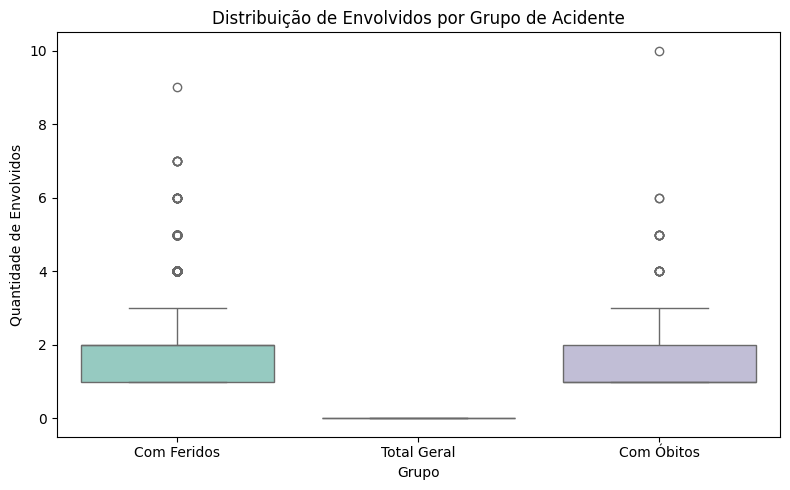

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=dados, x='grupo', y='qtde_envolvidos', palette='Set3')
plt.title('Distribui√ß√£o de Envolvidos por Grupo de Acidente')
plt.xlabel('Grupo')
plt.ylabel('Quantidade de Envolvidos')
plt.tight_layout()
plt.show()

A presen√ßa de muitos outliers em qtde_feridosilesos e qtde_envolvidos indica que, embora a maioria dos acidentes envolva um n√∫mero relativamente baixo de pessoas e feridos leves, h√° registros de acidentes com um n√∫mero muito elevado de envolvidos e feridos.

Isso √© t√≠pico em acidentes de grande escala, como colis√µes m√∫ltiplas em rodovias movimentadas ou acidentes com ve√≠culos de grande capacidade (√¥nibus, caminh√µes). Esses eventos s√£o menos frequentes, mas impactam fortemente as estat√≠sticas por conta da gravidade e do n√∫mero de v√≠timas.

Esses outliers s√£o importantes porque mostram que, apesar da maioria dos acidentes ser de menor porte, existem casos extremos que exigem aten√ß√£o especial em termos de preven√ß√£o, resposta emergencial e pol√≠ticas p√∫blicas.

## Histograma

A distribui√ß√£o de dados descreve como os valores de uma vari√°vel se espalham, ou seja, a frequ√™ncia com que diferentes valores ocorrem. Entender a distribui√ß√£o √© crucial na an√°lise de dados, pois revela padr√µes, tend√™ncias centrais, dispers√£o e a presen√ßa de valores at√≠picos (outliers). O histograma √© uma ferramenta visual fundamental para representar essa distribui√ß√£o, mostrando a forma dos dados, se s√£o sim√©tricos ou assim√©tricos, unimodais ou multimodais.

Gr√°fico de linhas da s√©rie temporal: total de acidentes por m√™s (agregado por ano)

<Figure size 1200x600 with 0 Axes>

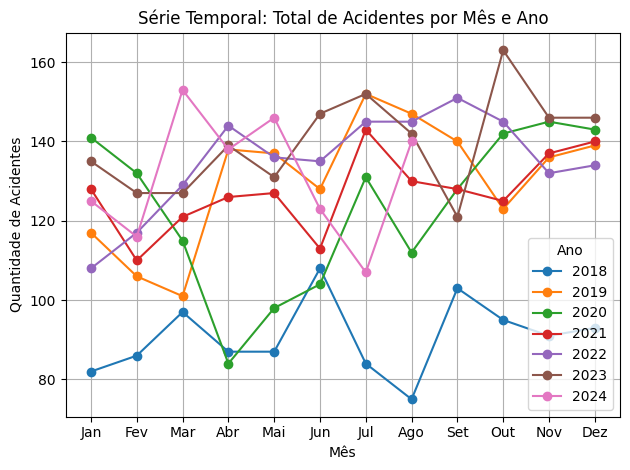

In [35]:
# Garantir convers√£o para datetime
dados['data_acidente'] = pd.to_datetime(dados['data_acidente'], errors='coerce')

# Criar colunas de ano e m√™s
dados['ano'] = dados['data_acidente'].dt.year
dados['mes'] = dados['data_acidente'].dt.month

# Agrupar por ano e m√™s, somando a quantidade de acidentes
acidentes_por_mes = dados.groupby(['ano', 'mes'])['qtde_acidente'].sum().reset_index()

# Pivotar para ter anos como colunas e meses como linhas
acidentes_pivot = acidentes_por_mes.pivot(index='mes', columns='ano', values='qtde_acidente')

# Plot da s√©rie temporal
plt.figure(figsize=(12, 6))
acidentes_pivot.plot(marker='o')
plt.title('S√©rie Temporal: Total de Acidentes por M√™s e Ano')
plt.xlabel('M√™s')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
    'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'
])
plt.grid(True)
plt.legend(title='Ano')
plt.tight_layout()
plt.show()

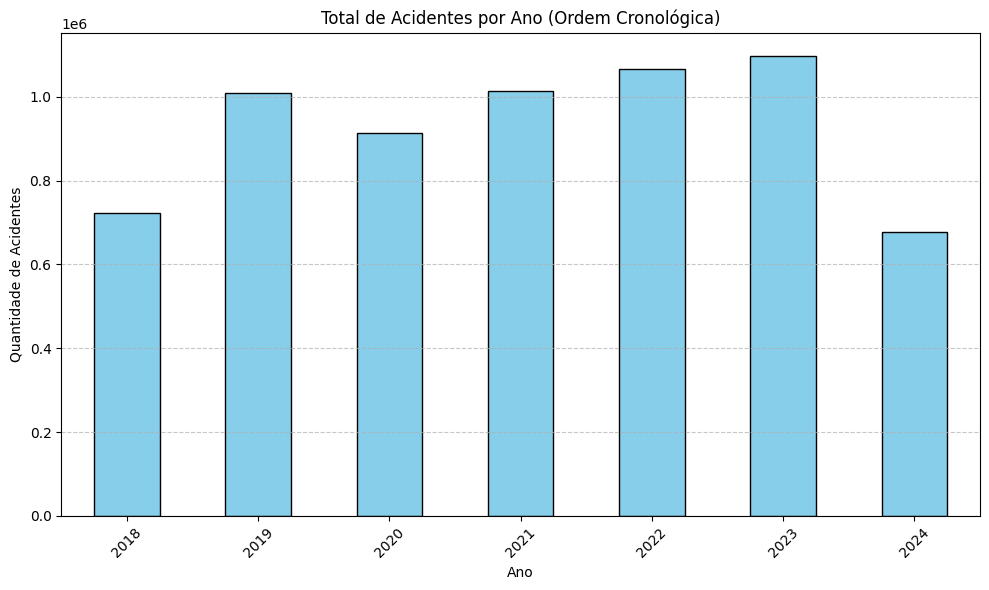

In [ ]:


# Garantir que 'data_acidente' est√° no formato datetime
dados_acidentes['data_acidente'] = pd.to_datetime(dados_acidentes['data_acidente'], errors='coerce')

# Extrair o ano da data
dados_acidentes['ano'] = dados_acidentes['data_acidente'].dt.year

# Agrupar por ano, somando a quantidade de acidentes
acidentes_por_ano = dados_acidentes.groupby('ano')['qtde_acidente'].sum().sort_index()

# Plotar gr√°fico de barras
plt.figure(figsize=(10, 6))
acidentes_por_ano.plot(kind='bar', color='skyblue', edgecolor='black')

# Ajustes visuais
plt.title('Total de Acidentes por Ano (Ordem Cronol√≥gica)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Lembrando que em 2024 n√£o temos os dados do ano todo e apenas at√© m√™s 8. Outra coisa importante de se notar pe que em 2020 com a pandemia deu uma reduzida e depois foi aumentando conforme as coisas foram normalizando.

Gr√°fico de barras empilhadas por tipo de acidente (tp_acidente) por m√™s

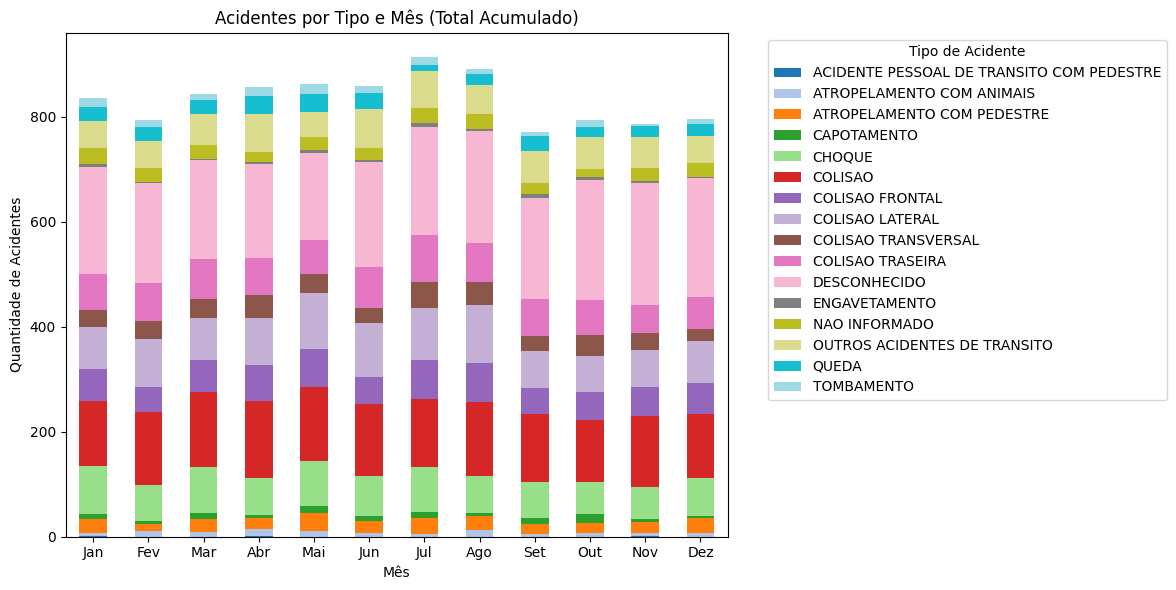

In [36]:
# Garantir que 'data_acidente' est√° no formato datetime
dados['data_acidente'] = pd.to_datetime(dados['data_acidente'], errors='coerce')

# Criar coluna de m√™s (caso ainda n√£o exista)
dados['mes'] = dados['data_acidente'].dt.month

# Agrupar por m√™s e tipo de acidente, somando a quantidade
acidentes_tipo_mes = dados.groupby(['mes', 'tp_acidente'])['qtde_acidente'].sum().unstack(fill_value=0)

# Plot de barras empilhado
acidentes_tipo_mes.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# T√≠tulo e r√≥tulos
plt.title('Acidentes por Tipo e M√™s (Total Acumulado)')
plt.xlabel('M√™s')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
    'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'
], rotation=0)
plt.legend(title='Tipo de Acidente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Nota-se que colis√£o √© o principal motivo de acidente.

Gr√°fico de barras empilhadas por condi√ß√£o meteorol√≥gica (cond_meteorologica) por m√™s

In [37]:
# Contar registros com condi√ß√£o meteorol√≥gica n√£o informada
nao_informado = dados[dados['cond_meteorologica'].str.upper() == 'NAO INFORMADO'].shape[0]

print(f"N√∫mero de registros com condi√ß√£o meteorol√≥gica n√£o informada: {nao_informado}")

N√∫mero de registros com condi√ß√£o meteorol√≥gica n√£o informada: 5052


In [38]:
# Total de registros
total = dados.shape[0]

# Lista de valores considerados como "desconhecidos"
valores_desconhecidos = ['NAO INFORMADO', 'DESCONHECIDO', 'IGNORADO']

# Contar registros com condi√ß√£o meteorol√≥gica considerada desconhecida
nao_informado = dados['cond_meteorologica'].astype(str).str.upper().isin(valores_desconhecidos).sum()

# Calcular porcentagem
porcentagem = (nao_informado / total) * 100

# Exibir resultado
print(f"N√∫mero de registros com condi√ß√£o meteorol√≥gica desconhecida ou n√£o informada: {nao_informado}")
print(f"Porcentagem de dados n√£o informados ou desconhecidos: {porcentagem:.2f}%")

N√∫mero de registros com condi√ß√£o meteorol√≥gica desconhecida ou n√£o informada: 5052
Porcentagem de dados n√£o informados ou desconhecidos: 50.52%


Metade dos registros n√£o possuem informa√ß√£o sobre as condi√ß√µes meteorol√≥gicas no momento dos acidentes. Isso representa uma limita√ß√£o importante para qualquer tentativa de correla√ß√£o entre clima e frequ√™ncia de acidentes.
Essa alta taxa de aus√™ncia pode indicar:

Problemas no processo de coleta de dados pelas autoridades ou sistemas automatizados;

Falta de obrigatoriedade ou padroniza√ß√£o no preenchimento dessa informa√ß√£o;

Despreparo ou baixa prioridade em registrar vari√°veis ambientais durante os atendimentos.

Portanto, qualquer an√°lise sobre impacto de chuva, neblina ou tempo limpo deve ser interpretada com cautela, j√° que o conjunto de dados est√° incompleto e enviesado.

## Matriz de Correla√ß√£o

A matriz de correla√ß√£o mede a for√ßa e a dire√ß√£o de uma rela√ß√£o linear que os atributos num√©ricos em rela√ß√£o as quantidades. Valores pr√≥ximos a 1 indicam uma forte correla√ß√£o positiva, -1 uma forte correla√ß√£o negativa, e 0 aus√™ncia de correla√ß√£o linear.

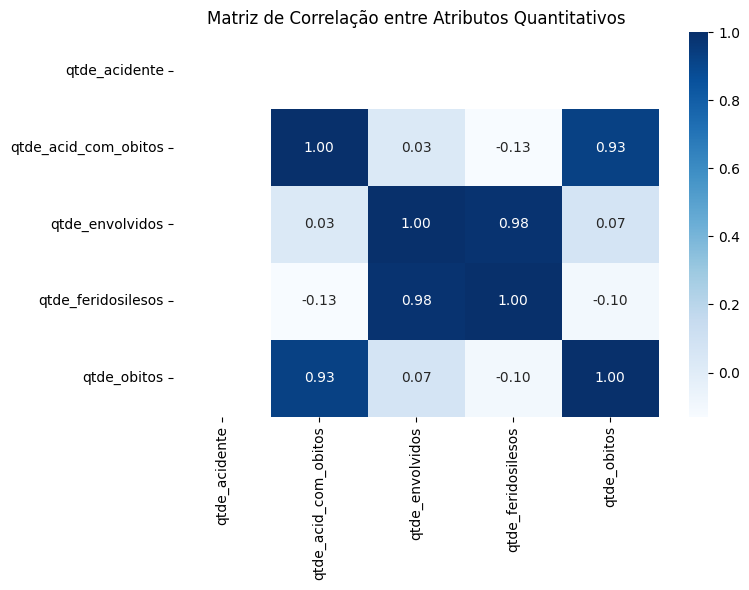

In [39]:
# Selecionar colunas quantitativas
colunas_quantitativas = [
    'qtde_acidente', 'qtde_acid_com_obitos',
    'qtde_envolvidos', 'qtde_feridosilesos', 'qtde_obitos'
]

# Gerar matriz de correla√ß√£o
correlacao = dados[colunas_quantitativas].corr()

# Plotar heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='Blues', fmt='.2f')
plt.title('Matriz de Correla√ß√£o entre Atributos Quantitativos')
plt.tight_layout()
plt.show()

Em rela√ß√£o a quantidade de acidentes, todos os valores comparados s√£o altamente correlacionados.

## Tratamento de Valores Nulos
O dataset Iris original n√£o possui valores nulos. No entanto, o tratamento de valores nulos √© crucial e pode envolver imputa√ß√£o (preenchimento com m√©dia, mediana, moda) ou remo√ß√£o de linhas/colunas.


In [40]:
# Verificar a presen√ßa de valores nulos no dataset original
print("Valores nulos no dataset Acidentes de Tr√¢nsito:")
dados.isnull().sum()

Valores nulos no dataset Acidentes de Tr√¢nsito:


num_acidente               0
chv_localidade             0
data_acidente              0
uf_acidente                0
ano_acidente               0
mes_acidente               0
mes_ano_acidente           0
codigo_ibge                0
dia_semana                 0
fase_dia                   0
tp_acidente                0
cond_meteorologica         0
end_acidente             349
num_end_acidente           0
cep_acidente               0
bairro_acidente         4091
km_via_acidente            0
latitude_acidente       6366
longitude_acidente      6365
hora_acidente              0
tp_rodovia                 0
cond_pista                 0
tp_cruzamento              0
tp_pavimento               0
tp_curva                   0
lim_velocidade             0
tp_pista                   0
ind_guardrail              0
ind_cantcentral            0
ind_acostamento            0
qtde_acidente              0
qtde_acid_com_obitos       0
qtde_envolvidos            0
qtde_feridosilesos         0
qtde_obitos                0
grupo                      0
ano                        0
mes                        0
dtype: int64

Como as colunas que apresentaram dados nulos, n√£o s√£o relevantes para a an√°lise desse dataset, vou remov√™-las


In [42]:
# Lista das colunas que voc√™ quer remover
colunas_para_remover = ['bairro_acidente', 'latitude_acidente', 'longitude_acidente', 'end_acidente']

# Remover as colunas do DataFrame
dados = dados.drop(columns=colunas_para_remover)

# Verificar se foram removidas
print(dados.columns)

Index(['num_acidente', 'chv_localidade', 'data_acidente', 'uf_acidente',
       'ano_acidente', 'mes_acidente', 'mes_ano_acidente', 'codigo_ibge',
       'dia_semana', 'fase_dia', 'tp_acidente', 'cond_meteorologica',
       'num_end_acidente', 'cep_acidente', 'km_via_acidente', 'hora_acidente',
       'tp_rodovia', 'cond_pista', 'tp_cruzamento', 'tp_pavimento', 'tp_curva',
       'lim_velocidade', 'tp_pista', 'ind_guardrail', 'ind_cantcentral',
       'ind_acostamento', 'qtde_acidente', 'qtde_acid_com_obitos',
       'qtde_envolvidos', 'qtde_feridosilesos', 'qtde_obitos', 'grupo', 'ano',
       'mes'],
      dtype='object')


Agora vamos tratar os dados Desdonhecidos e n√£o informados: Primeiramente vou transformar em NaN para poder fazer a exclus√£o.

In [43]:
import numpy as np

# Lista de valores considerados como desconhecidos
valores_desconhecidos = ['NAO INFORMADO', 'N√ÉO INFORMADO', 'DESCONHECIDO', 'IGNORADO', 'INDEFINIDO', 'SEM DADOS']

# Substituir em todas as colunas do DataFrame
dados_limpos = dados.replace(valores_desconhecidos, np.nan, regex=True)


In [45]:
# Remover registros com qualquer valor ausente
dados_limpos = dados_limpos.dropna()

# Verificar novo tamanho
print(f"Novo tamanho do dataset ap√≥s limpeza: {dados_limpos.shape}")

Novo tamanho do dataset ap√≥s limpeza: (1, 34)


# Pr√©-Processamento de Dados

O pr√©-processamento de dados √© uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [46]:
# Definindo o alvo (target)
y = dados['qtde_acidente']

# Removendo a coluna alvo do conjunto de vari√°veis explicativas
X = dados.drop('qtde_acidente', axis=1)

In [47]:
from sklearn.model_selection import train_test_split

# Definir vari√°vel alvo
y = dados['qtde_acidente']

# Remover a vari√°vel alvo do restante dos dados
X = dados.drop('qtde_acidente', axis=1)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [48]:
# Exibir as dimens√µes dos conjuntos de treino e teste
print(f"Dimens√µes de X_train : {X_train.shape}")
print(f"Dimens√µes de X_test  : {X_test.shape}")
print(f"Dimens√µes de y_train : {y_train.shape}")
print(f"Dimens√µes de y_test  : {y_test.shape}")

Dimens√µes de X_train : (8000, 33)
Dimens√µes de X_test  : (2000, 33)
Dimens√µes de y_train : (8000,)
Dimens√µes de y_test  : (2000,)


## Normaliza√ß√£o

A normaliza√ß√£o escala os dados para um intervalo fixo, geralmente entre 0 e 1. √â √∫til quando o algoritmo de machine learning assume que as caracter√≠sticas est√£o em uma escala semelhante. Fiz um histograma antes da normaliza√ß√£o para comparar.



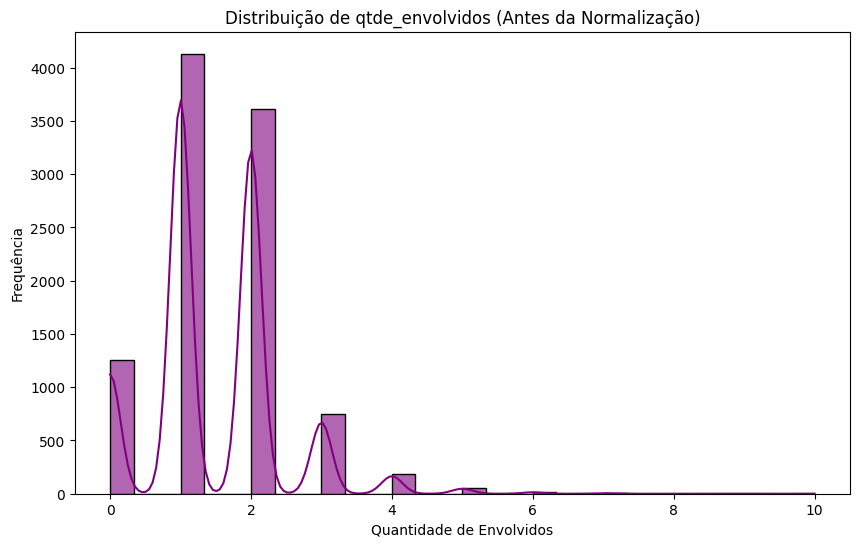

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(dados['qtde_envolvidos'].dropna(), bins=30, kde=True, color='purple', alpha=0.6)
plt.title('Distribui√ß√£o de qtde_envolvidos (Antes da Normaliza√ß√£o)')
plt.xlabel('Quantidade de Envolvidos')
plt.ylabel('Frequ√™ncia')
plt.show()

antes da normaliza√ß√£o o histograma mostra a distribui√ß√£o da quantidade de envolvidos, com um eixo x representando essa quantidade e o eixo y a frequ√™ncia (quantas vezes cada quantidade aparece).

O que chama aten√ß√£o:

- A maioria dos dados est√° concentrada em valores  pequenos e se concentra at√© a metade.

- H√° uma cauda longa para a direita, com algumas ocorr√™ncias de quantidades maiores, mas bem raras.

- O gr√°fico parece estar bem enviesado para a direita, t√≠pico de dados assim√©tricos.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Separar vari√°veis explicativas e alvo
X = dados.drop(columns=['qtde_envolvidos'])  # Altere se precisar
y = dados['qtde_envolvidos']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Instanciar o MinMaxScaler
scaler = MinMaxScaler()

# Selecionar apenas colunas num√©ricas
colunas_numericas = X_train.select_dtypes(include=['int64', 'float64']).columns

# Fazer c√≥pias para evitar altera√ß√£o direta no original
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# Aplicar normaliza√ß√£o (fit no treino e transform nos dois)
X_train_copy[colunas_numericas] = scaler.fit_transform(X_train_copy[colunas_numericas])
X_test_copy[colunas_numericas] = scaler.transform(X_test_copy[colunas_numericas])

# Criar DataFrames preservando √≠ndice e colunas
X_train_norm_df = pd.DataFrame(X_train_copy, columns=X_train.columns, index=X_train.index)
X_test_norm_df = pd.DataFrame(X_test_copy, columns=X_test.columns, index=X_test.index)

# Verificar o resultado
print("X_train normalizado:")
display(X_train_norm_df.head())

print("\nX_test normalizado:")
display(X_test_norm_df.head())

X_train normalizado:


num_acidente   chv_localidade data_acidente uf_acidente  ano_acidente  \
9254      0.789345  MG3106705202402    2024-02-07          MG      1.000000   
1561      0.850649  MG3144300201808    2018-08-13          MG      0.000000   
1670      0.098872  SP3548500202002    2020-02-07          SP      0.333333   
6087      0.132434  ES3205200201811    2018-11-28          ES      0.000000   
6669      0.363009  ES3201209202110    2021-10-01          ES      0.500000   

      mes_acidente  mes_ano_acidente  codigo_ibge     dia_semana fase_dia  \
9254      0.090909          0.090960     0.586159   QUARTA-FEIRA    TARDE   
1561      0.636364          0.636335     0.593252  SEGUNDA-FEIRA    TARDE   
1670      0.090909          0.090923     0.669515    SEXTA-FEIRA    TARDE   
6087      0.909091          0.909050     0.604742   QUARTA-FEIRA    MANHA   
6669      0.818182          0.818172     0.603989    SEXTA-FEIRA    MANHA   

      ...  ind_guardrail ind_cantcentral  ind_acostamento  qtde_acidente  \
9254  ...  NAO INFORMADO   NAO INFORMADO    NAO INFORMADO            0.0   
1561  ...  NAO INFORMADO   NAO INFORMADO    NAO INFORMADO            0.0   
1670  ...  NAO INFORMADO             SIM     DESCONHECIDO            0.0   
6087  ...  NAO INFORMADO   NAO INFORMADO    NAO INFORMADO            0.0   
6669  ...  NAO INFORMADO   NAO INFORMADO    NAO INFORMADO            0.0   

      qtde_acid_com_obitos  qtde_feridosilesos qtde_obitos        grupo   ano  \
9254                   0.0            0.222222         0.0  Com Feridos  2024   
1561                   0.0            0.222222         0.0  Com Feridos  2018   
1670                   0.0            0.222222         0.0  Com Feridos  2020   
6087                   0.0            0.111111         0.0  Com Feridos  2018   
6669                   0.0            0.111111         0.0  Com Feridos  2021   

     mes  
9254   2  
1561   8  
1670   2  
6087  11  
6669  10  

[5 rows x 33 columns]


X_test normalizado:


num_acidente   chv_localidade data_acidente uf_acidente  ano_acidente  \
6252      0.594310  PA1504208201802    2018-02-05          PA      0.000000   
4684      0.844298  DF5300108202303    2023-03-07          DF      0.833333   
1731      0.758949  SP3529203201911    2019-11-18          SP      0.166667   
4742      0.307209  SC4205407202408    2024-08-17          SC      1.000000   
4521      0.279029  MG3118601202309    2023-09-11          MG      0.833333   

      mes_acidente  mes_ano_acidente  codigo_ibge     dia_semana fase_dia  \
6252      0.090909          0.090905     0.283807  SEGUNDA-FEIRA    TARDE   
4684      0.181818          0.181855     1.000000    TERCA-FEIRA    MANHA   
1731      0.909091          0.909059     0.665874  SEGUNDA-FEIRA    TARDE   
4742      0.636364          0.636389     0.793457         SABADO    TARDE   
4521      0.727273          0.727285     0.588403  SEGUNDA-FEIRA    TARDE   

      ...  ind_guardrail ind_cantcentral  ind_acostamento  qtde_acidente  \
6252  ...  NAO INFORMADO   NAO INFORMADO    NAO INFORMADO            0.0   
4684  ...  NAO INFORMADO   NAO INFORMADO    NAO INFORMADO            0.0   
1731  ...  NAO INFORMADO   NAO INFORMADO     DESCONHECIDO            0.0   
4742  ...  NAO INFORMADO   NAO INFORMADO    NAO INFORMADO            0.0   
4521  ...  NAO INFORMADO   NAO INFORMADO    NAO INFORMADO            0.0   

      qtde_acid_com_obitos  qtde_feridosilesos qtde_obitos        grupo   ano  \
6252                   0.0            0.000000         0.0  Total Geral  2018   
4684                   0.0            0.444444         0.0  Com Feridos  2023   
1731                   0.0            0.111111         0.0  Com Feridos  2019   
4742                   0.0            0.111111         0.0  Com Feridos  2024   
4521                   0.0            0.111111         0.0  Com Feridos  2023   

     mes  
6252   2  
4684   3  
1731  11  
4742   8  
4521   9  

[5 rows x 33 columns]

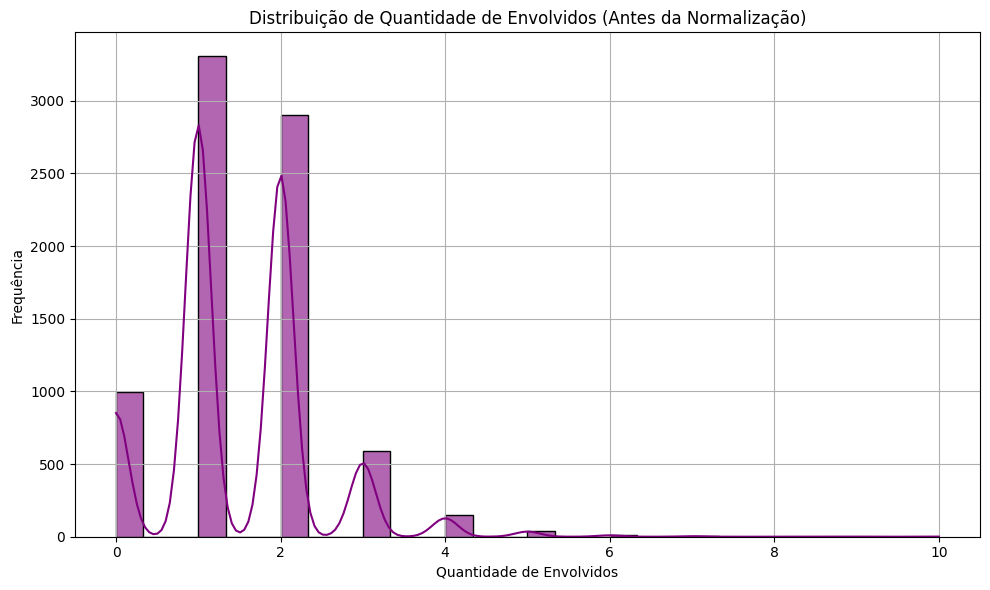

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotar histograma com curva KDE para y_train (qtde_envolvidos)
plt.figure(figsize=(10, 6))
sns.histplot(y_train.dropna(), bins=30, kde=True, color='purple', alpha=0.6)
plt.title('Distribui√ß√£o de Quantidade de Envolvidos (Antes da Normaliza√ß√£o)')
plt.xlabel('Quantidade de Envolvidos')
plt.ylabel('Frequ√™ncia')
plt.grid(True)
plt.tight_layout()
plt.show()

Histograma original: As distribui√ß√µes podem mostrar grandes picos para valores muito altos (representando muitos acidentes com poucos envolvidos), enquanto a maioria dos dados estar√° concentrada em valores pequenos.

Histograma normalizado: A normaliza√ß√£o transforma todos os valores para o intervalo [0, 1], fazendo com que a distribui√ß√£o fique mais concentrada, pois a varia√ß√£o de valores entre os dados diminui. O eixo X estar√° agora entre 0 e 1, e a forma da distribui√ß√£o ficar√° mais comprimida.

## Padroniza√ß√£o

A padroniza√ß√£o (ou Z-score scaling) transforma os dados para ter m√©dia 0 e desvio padr√£o 1. √â √∫til para algoritmos que s√£o sens√≠veis √† escala das caracter√≠sticas, como SVMs ou redes neurais.

In [52]:
from sklearn.preprocessing import StandardScaler

# Instanciar o scaler
scaler_std = StandardScaler()

# Ajustar e transformar apenas as colunas num√©ricas
X_train[colunas_numericas] = scaler_std.fit_transform(X_train[colunas_numericas])
X_test[colunas_numericas] = scaler_std.transform(X_test[colunas_numericas])

# Criar novos DataFrames com os dados padronizados
X_train_std_df = pd.DataFrame(X_train, columns=X_train.columns, index=X_train.index)
X_test_std_df = pd.DataFrame(X_test, columns=X_test.columns, index=X_test.index)

# Visualizar as primeiras linhas
print("X_train padronizado:")
display(X_train_std_df.head())

print("\nX_test padronizado:")
display(X_test_std_df.head())

X_train padronizado:


num_acidente   chv_localidade data_acidente uf_acidente  ano_acidente  \
9254      1.030803  MG3106705202402    2024-02-07          MG      1.597600   
1561      1.243901  MG3144300201808    2018-08-13          MG     -1.608957   
1670     -1.369352  SP3548500202002    2020-02-07          SP     -0.540104   
6087     -1.252688  ES3205200201811    2018-11-28          ES     -1.608957   
6669     -0.451186  ES3201209202110    2021-10-01          ES     -0.005678   

      mes_acidente  mes_ano_acidente  codigo_ibge     dia_semana fase_dia  \
9254     -1.304673         -1.304592    -0.571896   QUARTA-FEIRA    TARDE   
1561      0.459690          0.459604    -0.531718  SEGUNDA-FEIRA    TARDE   
1670     -1.304673         -1.304710    -0.099745    SEXTA-FEIRA    TARDE   
6087      1.341871          1.341790    -0.466633   QUARTA-FEIRA    MANHA   
6669      1.047811          1.047816    -0.470898    SEXTA-FEIRA    MANHA   

      ...  ind_guardrail ind_cantcentral  ind_acostamento  qtde_acidente  \
9254  ...  NAO INFORMADO   NAO INFORMADO    NAO INFORMADO            0.0   
1561  ...  NAO INFORMADO   NAO INFORMADO    NAO INFORMADO            0.0   
1670  ...  NAO INFORMADO             SIM     DESCONHECIDO            0.0   
6087  ...  NAO INFORMADO   NAO INFORMADO    NAO INFORMADO            0.0   
6669  ...  NAO INFORMADO   NAO INFORMADO    NAO INFORMADO            0.0   

      qtde_acid_com_obitos  qtde_feridosilesos qtde_obitos        grupo   ano  \
9254             -0.145567            0.582619   -0.133293  Com Feridos  2024   
1561             -0.145567            0.582619   -0.133293  Com Feridos  2018   
1670             -0.145567            0.582619   -0.133293  Com Feridos  2020   
6087             -0.145567           -0.481282   -0.133293  Com Feridos  2018   
6669             -0.145567           -0.481282   -0.133293  Com Feridos  2021   

     mes  
9254   2  
1561   8  
1670   2  
6087  11  
6669  10  

[5 rows x 33 columns]


X_test padronizado:


num_acidente   chv_localidade data_acidente uf_acidente  ano_acidente  \
6252      0.352842  PA1504208201802    2018-02-05          PA     -1.608957   
4684      1.221825  DF5300108202303    2023-03-07          DF      1.063174   
1731      0.925143  SP3529203201911    2019-11-18          SP     -1.074531   
4742     -0.645150  SC4205407202408    2024-08-17          SC      1.597600   
4521     -0.743107  MG3118601202309    2023-09-11          MG      1.063174   

      mes_acidente  mes_ano_acidente  codigo_ibge     dia_semana fase_dia  \
6252     -1.304673         -1.304768    -2.284502  SEGUNDA-FEIRA    TARDE   
4684     -1.010612         -1.010559     1.772218    TERCA-FEIRA    MANHA   
1731      1.341871          1.341820    -0.120368  SEGUNDA-FEIRA    TARDE   
4742      0.459690          0.459780     0.602299         SABADO    TARDE   
4521      0.753750          0.753813    -0.559183  SEGUNDA-FEIRA    TARDE   

      ...  ind_guardrail ind_cantcentral  ind_acostamento  qtde_acidente  \
6252  ...  NAO INFORMADO   NAO INFORMADO    NAO INFORMADO            0.0   
4684  ...  NAO INFORMADO   NAO INFORMADO    NAO INFORMADO            0.0   
1731  ...  NAO INFORMADO   NAO INFORMADO     DESCONHECIDO            0.0   
4742  ...  NAO INFORMADO   NAO INFORMADO    NAO INFORMADO            0.0   
4521  ...  NAO INFORMADO   NAO INFORMADO    NAO INFORMADO            0.0   

      qtde_acid_com_obitos  qtde_feridosilesos qtde_obitos        grupo   ano  \
6252             -0.145567           -1.545183   -0.133293  Total Geral  2018   
4684             -0.145567            2.710421   -0.133293  Com Feridos  2023   
1731             -0.145567           -0.481282   -0.133293  Com Feridos  2019   
4742             -0.145567           -0.481282   -0.133293  Com Feridos  2024   
4521             -0.145567           -0.481282   -0.133293  Com Feridos  2023   

     mes  
6252   2  
4684   3  
1731  11  
4742   8  
4521   9  

[5 rows x 33 columns]

O que eu fiz:

‚úÖ Tratei nulos corretamente (inclusive "desconhecido" e "n√£o informado")

‚úÖ Normalizei (0 a 1)

‚úÖ Padronizei (m√©dia 0, desvio 1) as colunas num√©ricas

‚úÖ Colunas categ√≥ricas ficaram separadas, prontas para seguir na an√°lise.

## Outras Transforma√ß√µes e Etapas de Pr√©-Processamento

Outras etapas de pr√©-processamento incluem a sele√ß√£o de caracter√≠sticas, redu√ß√£o de dimensionalidade (como PCA) ou cria√ß√£o de novas caracter√≠sticas (feature engineering). O que voc√™ faria a mais?



Professor, a mais eu poderia fazer:


üìÑ Importar dados (CSV do Drive)

   ‚Üì

üîé Explorar dados iniciais
   - Ver shape
   - Ver tipos (dtypes)
   - Ver nulos e "desconhecido"

   ‚Üì

üßπ Tratar dados nulos
   - Remover colunas irrelevantes
   - Substituir "desconhecido"/"n√£o informado" por NaN
   - Decidir se remove linhas ou preenche

   ‚Üì

‚öôÔ∏è Convers√£o de tipos
   - Garantir que num√©ricas sejam float/int
   - Categ√≥ricas como object

   ‚Üì

üî¢ Normaliza√ß√£o (0 a 1)

   ‚Üì

üìä Padroniza√ß√£o (m√©dia 0, desvio 1) das num√©ricas

   ‚Üì

üéØ Engenharia inicial de features (opcional para MVP)
   - Criar hora agrupada
   - Criar final de semana
   (Se incluir, apenas at√© cria√ß√£o, sem modelar!)

   ‚Üì

‚úÖ Dataset pr√©-processado pronto

   ‚Üì
   
‚ú® FIM do MVP (pronto para modelagem em futuros MVPs)


Professor, nessa etapa do projeto, eu trabalhei principalmente no pr√©-processamento e na organiza√ß√£o do banco de dados de acidentes de tr√¢nsito no Brasil, que cobre o per√≠odo de 2018 a 2023. A ideia foi justamente preparar esses dados para an√°lises futuras, como modelagem estat√≠stica e aprendizado de m√°quina, que a gente vai ver nos pr√≥ximos MVPs.

Comecei levantando algumas perguntas e, ao longo da an√°lise, fui encontrando as seguintes respostas:

‚úÖ O n√∫mero de acidentes aumentou ao longo dos anos?
Sim, h√° uma tend√™ncia de crescimento. S√≥ n√£o foi poss√≠vel verificar com clareza os dados de 2024, pois ainda n√£o estavam completos at√© dezembro, que costuma ser o m√™s com mais ocorr√™ncias.

‚úÖ Quais estados t√™m os maiores √≠ndices de acidentes e de acidentes com √≥bitos?
Minas Gerais e S√£o Paulo lideram o n√∫mero total de acidentes ‚Äî esse resultado me surpreendeu, pois eu achava que SP estaria em primeiro. J√° em rela√ß√£o aos acidentes com mortes, S√£o Paulo √© o estado com mais registros, seguido de Minas.

‚úÖ Quais os tipos de acidente mais frequentes?
Colis√£o e colis√£o lateral s√£o os mais comuns.

‚úÖ Quais dias da semana t√™m mais acidentes?
Sexta e s√°bado lideram. Isso sugere que pol√≠ticas de preven√ß√£o e fiscaliza√ß√£o deveriam ser refor√ßadas nesses dias, especialmente devido ao poss√≠vel aumento no consumo de bebida alco√≥lica nos fins de semana.

‚úÖ As condi√ß√µes meteorol√≥gicas influenciam?
Minha an√°lise foi inconclusiva. Por√©m, como a maioria dos acidentes acontece em rodovias municipais, geralmente em √°reas urbanas e nos fins de semana, acredito que o clima tenha uma influ√™ncia menor e n√£o seja o fator principal.

‚úÖ Quais rodovias concentram mais acidentes?
Rodovias municipais, seguidas das estaduais e federais. Isso indica que muitos acidentes ocorrem dentro dos centros urbanos.

‚úÖ Qual a propor√ß√£o de envolvidos, feridos e √≥bitos?
Mais de 98% dos envolvidos s√£o feridos ilesos. √ìbitos representam uma pequena parcela, mas com grande impacto social.

Durante o tratamento, ficou claro que os finais de semana e os centros urbanos s√£o os pontos que mais exigem aten√ß√£o por parte das autoridades. Tamb√©m foi poss√≠vel identificar padr√µes nos tipos de acidente e nas vias mais perigosas, o que pode ajudar na formula√ß√£o de pol√≠ticas p√∫blicas mais eficazes.

No geral, foi muito gratificante ver que s√≥ com o pr√©-processamento j√° conseguimos extrair v√°rios insights. Consegui organizar as vari√°veis, tratar valores nulos, normalizar e padronizar os dados, preparando um dataset limpo e pronto para as pr√≥ximas etapas.

Pessoalmente, foi uma experi√™ncia muito rica. Conversei com colegas, troquei ideias, tirei d√∫vidas e percebi o quanto evolu√≠ desde o primeiro MVP. Aprendi bastante sobre o processo de tratamento de dados e, principalmente, sobre como os dados podem nos ajudar a entender problemas reais. Estou muito feliz com tudo que estou aprendendo na p√≥s e animada para continuar desenvolvendo as pr√≥ximas fases.